In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('music_data.csv')


In [3]:
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,05-01-1920,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,01-01-1920,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,01-10-1920,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,25-12-2020,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,22-01-2021,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,09-12-2020,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,07-01-2021,0.0377,171.319,0.3200,2021


In [4]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,05-01-1920,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,01-01-1920,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,01-10-1920,0.0768,122.076,0.2990,1920


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [6]:
data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [7]:
data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [8]:
data.nunique()

acousticness          4929
artists              36195
danceability          1233
duration_ms          56306
energy                2306
explicit                 2
id                  172230
instrumentalness      5400
key                     12
liveness              1740
loudness             25580
mode                     2
name                137013
popularity              98
release_date         11043
speechiness           1633
tempo                84123
valence               1707
year                   102
dtype: int64

In [9]:
data.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,-5.089,0,The One,0,25-12-2020,0.0356,125.972,0.186,2020
174385,0.79500,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,-11.665,1,A Little More,0,22-01-2021,0.0360,94.710,0.228,2021
174386,0.80600,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,-12.393,0,Together,0,09-12-2020,0.0282,108.058,0.714,2020
174387,0.92000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0,0.113,-12.077,1,champagne problems,69,07-01-2021,0.0377,171.319,0.320,2021
174388,0.23900,['Roger Fly'],0.677,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7,0.215,-12.237,1,Improvisations,0,09-12-2020,0.0258,112.208,0.747,2020


In [10]:
# standarized the data
datatypes = ['float64']
    
scaler = MinMaxScaler()

standarized_data = scaler.fit_transform(data.select_dtypes(include=datatypes))


In [11]:
standarized_data

array([[0.99497992, 0.60526316, 0.224     , ..., 0.09639547, 0.61590016,
        0.634     ],
       [0.64558233, 0.86234818, 0.517     , ..., 0.05499485, 0.35682342,
        0.95      ],
       [0.99698795, 0.6548583 , 0.186     , ..., 0.1791967 , 0.40080983,
        0.689     ],
       ...,
       [0.80923695, 0.6791498 , 0.589     , ..., 0.02904222, 0.44375726,
        0.714     ],
       [0.92369478, 0.46761134, 0.24      , ..., 0.03882595, 0.70354856,
        0.32      ],
       [0.23995984, 0.68522267, 0.46      , ..., 0.02657055, 0.46079989,
        0.747     ]])

In [12]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(standarized_data)
    wcss.append(kmeans.inertia_)


C:\Users\vaish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vaish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vaish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vaish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

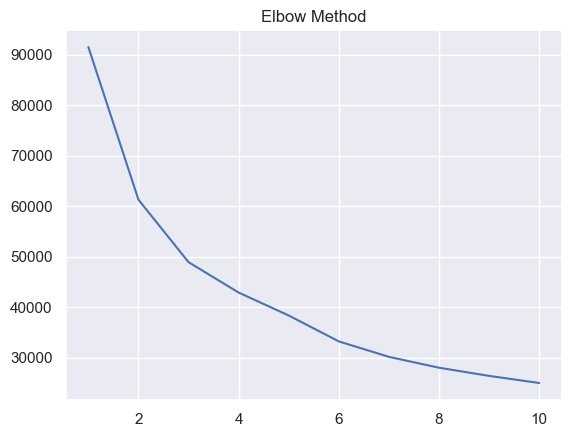

In [13]:
sns.set()


plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
  # Within-Cluster-Sum-of-Squares
plt.show()

In [14]:
optimal_cluster = 3
kmeans = KMeans(n_clusters = optimal_cluster)

data['cluster'] = kmeans.fit_predict(standarized_data)

C:\Users\vaish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
class MusicRecommendationSystem:
    
    def __init__(self, dataset):
        self.dataset = dataset

    def recommend(self, song_name,count =5):
        
        # Find the cluster of the given song
        song_cluster = self.dataset[self.dataset['name'].str.lower() == song_name.lower()]['cluster'].values[0]
        print(song_cluster)

        # Get songs from the same cluster
        cluster_songs = self.dataset[self.dataset['cluster'] == song_cluster]
        print(cluster_songs.head())
        print(song_name)
        cluster_songs = cluster_songs[cluster_songs['name'].str.lower() != song_name.lower()]
        print(cluster_songs.head())
        # Sort by popularity 
        recommendations = cluster_songs.sort_values('popularity', ascending=False).head(count)

        # Display selected columns
        columns = ['artists', 'name', 'popularity']
        
        return recommendations[columns]

In [16]:
recommendation_system = MusicRecommendationSystem(data)

In [18]:
recommendation_system.recommend('Lovers Rock',5)

0
    acousticness                artists  danceability  duration_ms  energy  \
3       0.000173    ['Oscar Velazquez']         0.730       422087   0.798   
4       0.295000               ['Mixe']         0.704       165224   0.707   
9       0.006820             ['Meetya']         0.571       476304   0.753   
13      0.004780           ['Justrock']         0.643       304078   0.998   
20      0.023900  ['Ron van der Kraan']         0.744       215773   0.428   

    explicit                      id  instrumentalness  key  liveness  \
3          0  19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2     0.128   
4          1  2hJjbsLCytGsnAHfdsLejp          0.000246   10     0.402   
9          0  06NUxS2XL3efRh0bloxkHm          0.873000    8     0.092   
13         0  0DH1IROKoPK5XTglUt9Pq0          0.476000    1     0.105   
20         0  0MwMyEO5AxYpghTU6gB85H          0.000031    9     0.106   

    loudness  mode                                               name  \
3     -7.311     

,artists,name,popularity
19866,['Ariana Grande'],positions,96
19862,"['24kGoldn', 'iann dior']",Mood (feat. iann dior),96
19976,['KAROL G'],BICHOTA,95
19886,"['Bad Bunny', 'Jhay Cortez']",DÁKITI,95
19876,['Billie Eilish'],Therefore I Am,94
